Prática a respeito dos algoritmos Naive Bayes e de regras.

A base de dados utilizado é Musshrom, que classifica cogumelos em comestíveis ou venenosos.

# Pre processamento dos dados

In [87]:
import pandas as pd
import numpy as np

* Fonte: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [2]:
datas = pd.read_csv('/content/mushrooms.csv')

In [3]:
datas.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [88]:
datas.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
datas.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- Divisão entre previsores e classe




In [89]:
type(datas)

pandas.core.frame.DataFrame

In [4]:
# converter para uma matriz numpy
# X_base = novo dataframe a partir de 'datas' com indexação baseada em índices numéricos
# matriz X_base contém os valores das colunas de índices 1 a 22 do DataFrame datas.
X_base = datas.iloc[:, 1:23].values

In [ ]:
X_base

array([['x', 2, 4, ..., 2, 3, 'u'],
       ['x', 2, 9, ..., 3, 2, 'g'],
       ['b', 2, 8, ..., 3, 2, 'm'],
       ...,
       ['f', 2, 4, ..., 0, 1, 'l'],
       ['k', 3, 4, ..., 7, 4, 'l'],
       ['x', 2, 4, ..., 4, 1, 'l']], dtype=object)

In [ ]:
type(X_base)

numpy.ndarray

- classe

In [5]:
y_base = datas.iloc[:, 0].values

In [ ]:
y_base

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

**Tratamento de atributos categóricos**

        **OneHotEncoder**

atribui rótulos únicos para cada categoria dentro de cada variável categórica, normalmente usando o LabelEncoder

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder_base = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), list(range(0, len(datas.columns)-1)))], remainder='passthrough')
X_base = onehotencoder_base.fit_transform(X_base)

In [93]:
X_base

array([[1., 0., 0., ..., 0., 0., 5.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 2.]])

**Dividir em treino e teste**

In [44]:
from sklearn.model_selection import train_test_split

In [68]:
X_base_treinamento, X_base_teste, y_base_treinamento, y_base_teste = train_test_split(X_base, y_base, test_size = 0.15, random_state = 0)

In [69]:
X_base_treinamento.shape, y_base_treinamento.shape

((6905, 136), (6905,))

In [70]:
X_base_teste.shape, y_base_teste.shape

((1219, 136), (1219,))

**Salvar as variaveis**

In [71]:
import pickle

In [72]:
with open('base.pkl', mode = 'wb') as f:
  pickle.dump([X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste], f)

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB # para gerar a tabela de probabilidade
from sklearn.metrics import accuracy_score # medir acuracia
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

In [96]:
with open('base.pkl', 'rb') as f:
  X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(f)

In [97]:
X_base_treinamento.shape, y_base_treinamento.shape

((6905, 136), (6905,))

In [75]:
X_base_teste.shape, y_base_teste.shape

((1219, 136), (1219,))

In [98]:
naive_base = GaussianNB()
naive_base.fit(X_base_treinamento, y_base_treinamento)
previsoes = naive_base.predict(X_base_teste)
previsoes

array(['p', 'e', 'e', ..., 'e', 'e', 'p'], dtype='<U1')

In [99]:
accuracy_score(y_base_teste, previsoes)

0.9893355209187858

 acurácia satisfatória

0.9893355209187858

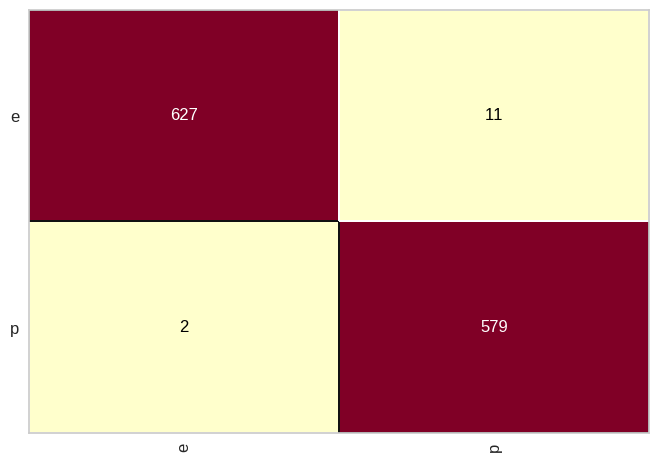

In [100]:
cm = ConfusionMatrix(naive_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

comparar classe de teste com previsões

In [86]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           e       1.00      0.98      0.99       638
           p       0.98      1.00      0.99       581

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219

